# [DUN](http://www.if.pw.edu.pl/~zebra/tbjjz.php?dir=DUN)

# Wykład 1 (DUN1)

Jedno kolokwium a la egzamin połówkowy, czwórka z niego oznacza zwolnienie z połowy egzaminu końcowego, żeby rozbić materiał na coś sensownego

Uważać na opracowania internetowe, często mają błędy! Dopytywać w razie nieścisłości i wątpliwości!

**Dygresje są ważne!**

Płaszczyzna fazowa: wykres $p(x)$ zamiast $x(t)$

Całe to wszystko ma nazwę profesjonalną Complex Systems oraz dziennikarską, "Teoria chaosu".

Chaos deterministyczny: trajektrorie NIE POWTARZAJĄ SIĘ mimo deterministycznego równania, które je opisuje. Silna zależność od warunków początkowych.

Horyzont przewidywalności - czas po jakim nie możemy już przewidzieć zachowania układu (to chyba nie jest jedna, sztywna granica)...

Do układów nieliniowych stosuje się metody explicit liczenia numerycznego (polecam wikipedię), prawdopodobnie dlatego że implicit z odwracaniem macierzy $A^-1$ się sypią przez $det A = 0$ ?

Przykłady niestabilności:
* Solitony optyczne
* Cała metorologia, przewidywanie klimatu
* W telekomunikacji (szyfrowanie danych przez deterministyczną ewolucję czasową?)
* Chemia (reakcje Biełusowa-Tego drugiego czy jak im tam było)
* Rezonans stochastyczny (szum zawiera fourierowskie składowe które wzmacniają drgania?)
* Medyczna:
    * Elektrofizjologia (badania na PW, serce, mięśnie, naczynia krwionośne)
    * Hemodynamika (fraktalne naczynia krwionośne)
    * Neurologia
* Dynamika symboliczna (T. Buchner)
* Intermittency
* Analiza fraktalna

Monika Petelczyc vs J.J. Żebrowski - dwa różne podejścia, stochastyczne vs deterministyczne




### Jak to zwykle wygląda

Mamy szum. Czy ten szum jest losowy? Czy istnieje *odzworowanie* $x_{n+1} = f(x_n)$?

Przykład: *mapa logistyczna*:
$x_{n+1} = r x_n (1-x_n)$

Tzw. wykres bifurkacyjny


[Samoorganizująca się krytyczność (Self organized criticality)](https://en.wikipedia.org/wiki/Self-organized_criticality)

# Wykład 2 (DUN2)

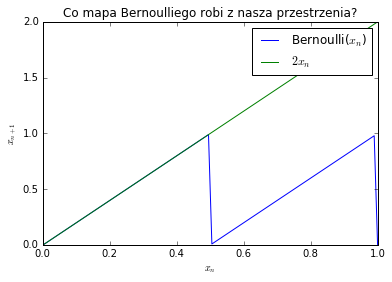

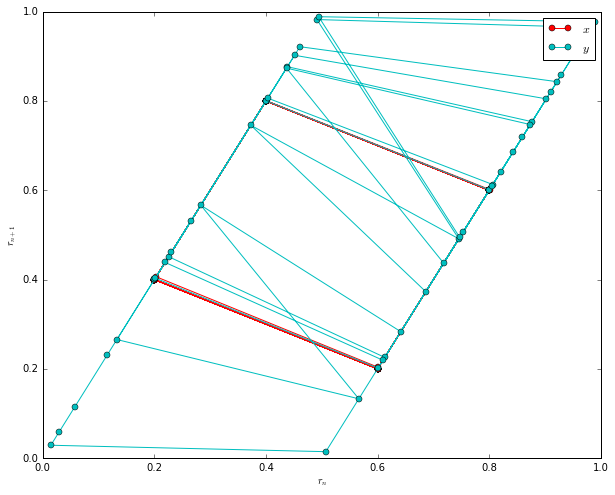

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Bernoulli(x, a):
    return (a*x)%1

x = np.linspace(0,1,100)
y = x
a = 2
for i in range(1):
    y = Bernoulli(y, a)

plt.title('Co mapa Bernoulliego robi z nasza przestrzenia?')
plt.plot(x, y, label='Bernoulli($x_n$)')
plt.plot(x, a*x, label='${}x_n$'.format(a))
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.legend()


x = 0.2
y = 0.2001
xl = []
yl = []
tl = []
dl = []
for i in range(50):
    xl.append(x)
    yl.append(y)
    tl.append(i)
    dl.append(abs(y-x))
    x = Bernoulli(x, a)
    y = Bernoulli(y, a)

fig, axes = plt.subplots(figsize=(10,8))
axes.set_title('')
axes.set_xlabel('$r_n$')
axes.set_ylabel('$r_{n+1}$')
axes.plot(xl[:-1], xl[1:], 'ro-', label='$x$')
axes.plot(yl[:-1], yl[1:], 'co-', label='$y$')
plt.legend()

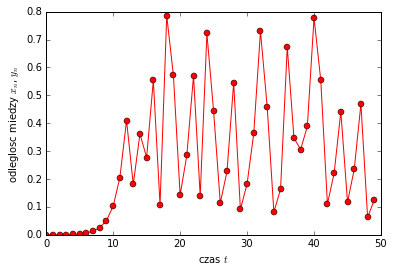

In [20]:
plt.xlabel("czas $t$")
plt.ylabel("odleglosc miedzy $x_n$, $y_n$")
plt.plot(tl, dl, 'ro-');

Doskonale tutaj widać, że w początkowym fragmencie różnica odległości rośnie wykładniczo! Dlaczego później przestaje? Bo wchodzi modulo 1!

1.44269504089


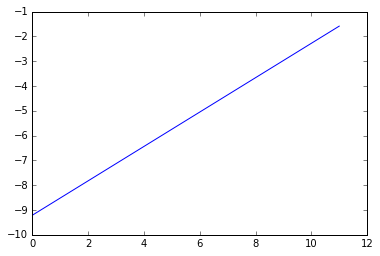

In [11]:
tl_exp = exponential_fragment_tl = tl[:12]
dl_exp = exponenential_fragment_dl = dl[:12]
dl_exp_log = [np.log(x) for x in dl_exp]
plt.plot(tl_exp, dl_exp_log)
from scipy.optimize import curve_fit
def linear_function(x, a, b):
    return a*x+b

parameters, covariances = curve_fit(linear_function, dl_exp_log, tl_exp)
lyapunov_exponent = parameters[0]
print(lyapunov_exponent)

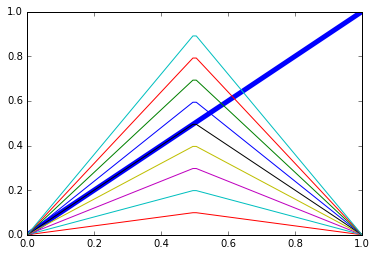

In [3]:
def tent(x, a):
    return a*(1-2*np.abs(0.5-x))

x = np.linspace(0,1,100)
plt.plot(x, x, lw=5)
for a in np.linspace(0,1,10, endpoint=False):
# for a in (0.9999999999999999999,):  
    y = x
    for i in range(1):
        y = tent(y, a)

    plt.plot(x, y)

## Gęstość niezmiennicza
[Wikipedia](https://en.wikipedia.org/wiki/Invariant_measure) ma art o miarze niezmienniczej i to jest coś nieco innego.

Gęstość niezmiennicza jest fajnie opisana na [Mathworld](http://mathworld.wolfram.com/NaturalInvariant.html). Intuicyjny koncept jak się zastanowić. **Ułamek czasu, jaki układ w swojej końcowej orbicie spędza w częsci $x + dx$ swojej dostępnej trajektorii, nazywamy gęstością niezmienniczą $\rho(x)$.**

# Wykład 3 (DUN3)

Równiania tych dwóch gości co nie pamiętam nazwisk: tam są 87 równania kinetyki chemicznej, które sprowadzają się do 1 odwzorowania. *Noice.*


### Skąd się wzięły DUNy?

Problem wziął się z obserwacji astronomicznych i mechaniki klasycznej. Rozgryźli (m.in. Poincare rozgryzł), że o ile problem dwóch ciał da się rozwiązać analitycznie (jako że ma symetrie i jest **zachowawczy**), to problem trzech ciał już nie - jest **niecałkowalny**. A to jest ważny problem, bo na przykład orbita Merkurego ma problemy i nie ma takiej sympatycznej dwu-ciałowej orbity.

Dla tych dwuciałowych stosowano **rachunek zaburzeń** (patrz: mechanika kwantowa), ale jak go próbowali zastosować w trzyciałowych, to on nie dawał dobrych wyników nawet przy szóstym (a to już poważna sprawa) rzędzie. Rzeczywisty układ ma tą silną zależność od warunków początkowych ("szum" zamiast widocznych struktur na diagramie fazowym), której rachunek zaburzeń nie daje.

BTW $H = (p_1^2 + q_1^2 + p_2^2 + q_2^2)/2$, hamiltonian oscylatora 2d, można przedstawić jako ruch po torusie.

Re: demonstracji niewielkiej różnicy warunków początkowych w problemie trzech ciał, taka "tęczowa" symulacja:
> Now you're thinking with ~~portals~~ slightly perturbed initial conditions.

Przykład obecnego użycia: nieliniowe rozpraszanie się wiązek cząstek w akceleratorach, *CERN, hadrony, te rzeczy*.


### Atraktory

Generalnie jeśli układ ma jakąś wbudowaną dysypację *(wtedy nie da się zapisać dla niego hamiltonianu bo hamiltonian to i tak miara energii całkowitej układu, a tutaj ona w pewnym sensie ucieka (przynajmniej praktyczne postaci, na ciepło, tarcie, itd - można go "zapatchować" dając wyrazy proporcjonalne do $v$)*, to ma co najmniej jeden **atraktor** (zbiór punktów w przestrzeni fazowej do których zbiega jego trajektoria) oraz **basen atrakcji** (zbiór punktów z których trajektoria zbiega do danego atraktora). Prosty przykład: rzut kulą, z oporem powietrza i tarciem. Atraktorem jest ziemia i spoczynek ciała.

Generalnie mechanika lagranżowska jest do dysypacji i atraktorów lepszy *(podwójne wahadło?)*.


### Odwzorowanie Chirikova

Troszkę jak *two-stream instability*?

Two-stream instability nie jest odwzorowaniem, bo to jest rozwiązanie równania różniczkowego. Ma parametr $dt$, od którego zależy trajektoria układu. Whoa.


### Kosmos

NASA i ich orbit patching przez grzanie silnikami w odpowiednich punktach orbit

Rezonanse w układzie Planetoidy-Jowisz-Słońce powodują zaburzenia gęstości planetoid *(Lagrange points?)*

Przerwy w pierścieniach, dajmy na to, Saturna, są powodowane właśnie rezonansami

# Odwzorowania unimodalne

"Jednogarbne" - mają jedno gładkie maksimum. Mnóstwo układów się da tym przybliżyć, tak samo jak oscylatorem harmonicznym.

$x_{n+1} = \sin(x_n)^2$

Przykłady: odwzorowanie logistyczne, kwadratowe $c-x_n^2$ w $(-1,1)$. One wszystkie mają to do siebie że są **nieodwracalne** (nie da się policzyć jednoznacznego $x_n = f(x_{n+1}) = L^{-1}(x_{n+1})$ i to właśnie powoduje bogactwo ciekawych zjawisk.

Skąd logika na coś takiego

$x_{n+1} = r x_n$ - może modelować reprodukcję owadów

$x_{n+1} = r x_n (1-x_n)$ - maksymalna pojemność środowiska (pożywienie, drapieżniki, miejsce...)

### Jak się ma iteracyjne złożenie funkcji $x_n$ do eigenwektorów i tego, że układ zostaje pomnożony przez maksymalną wartość, a reszta eigenwektorów jest tłumiona (power series)?

Jest taki mały gryzoń w Szwecji, co ma populację $x_n \sim c$ na północy, a $x_n \sim \sin(x)^2$ na południu. To znaczy że na południu jest jakiś drapieżnik co je tam tłamsi.


Dla $r=4$ istnieje zamiana zmiennych $x = \sin(\pi y /2)^2 $ między mapą logistyczną (tutaj $x$) a odwzorowaniem namiotowym (tam $y$), dzięki której tam można policzyć analitycznie gęstość niezmienniczą

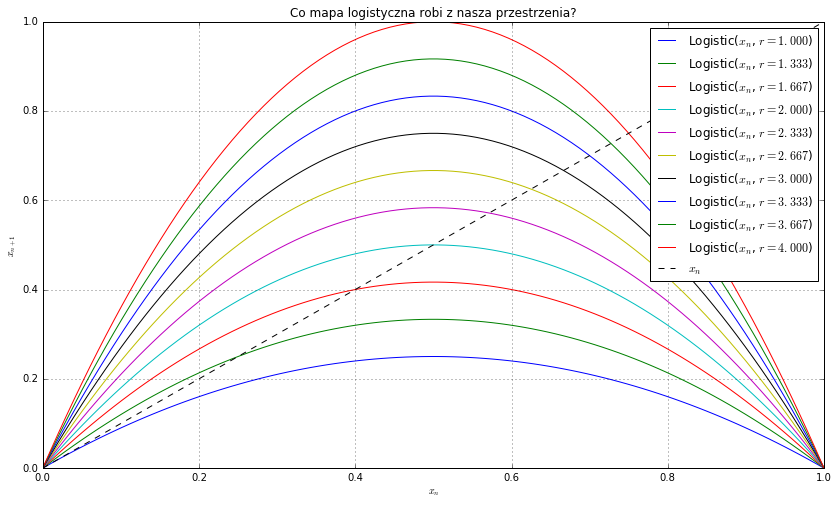

In [52]:
def Logistic(x, r):
    return r*x*(1.-x)

x = np.linspace(0,1,100)
y = x
fig1, axes1 = plt.subplots(figsize=(14,8))
for r in np.linspace(1,4,10):
    y = Logistic(x, r)
    axes1.plot(x, y, label='Logistic($x_n$, $r={:.3f}$)'.format(r))
axes1.set_title('Co mapa logistyczna robi z nasza przestrzenia?')
axes1.plot(x, x, 'k--', label='$x_n$')
axes1.set_xlabel('$x_n$')
axes1.set_ylabel('$x_{n+1}$')
axes1.grid()
plt.legend()


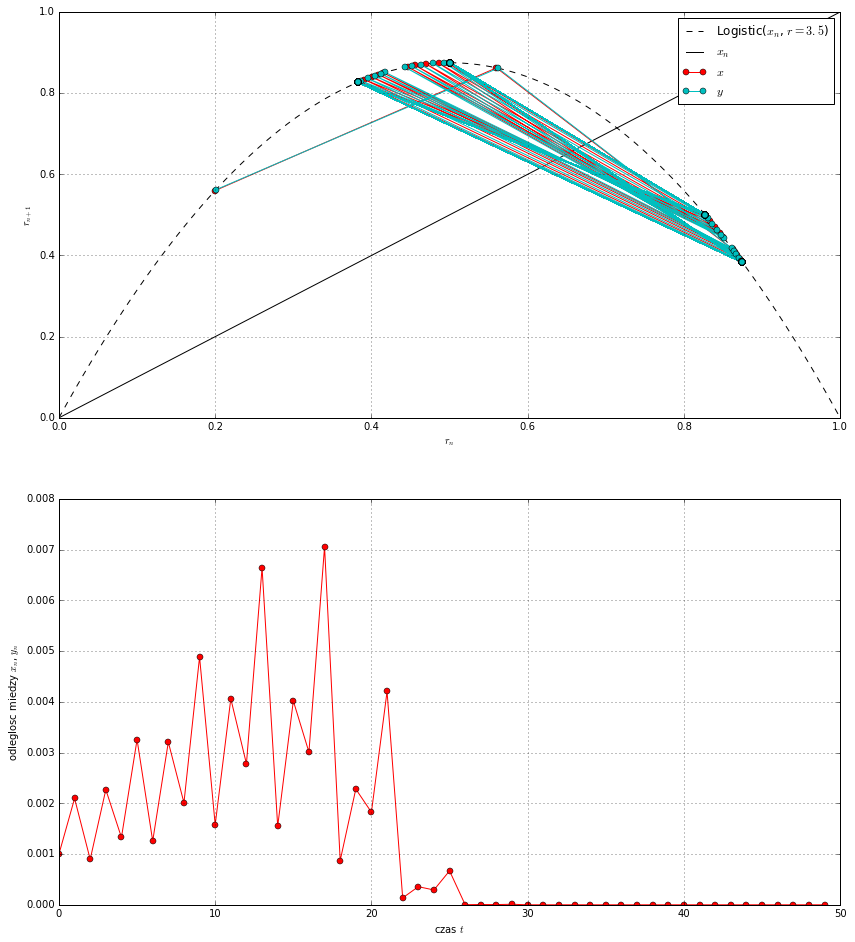

In [65]:
def Logistic(x, r):
    return r*x*(1.-x)

def LogisticTrajectory(x_0=0.2, delta_x = 0.001, r=3.5, NT=500, Nmax=50):
    x_grid = np.linspace(0,1,100)
    x = x_0
    y = x_0+delta_x
    NT = n_iterations = 500
    xl = np.zeros(NT)
    yl = np.zeros(NT)
    for i in range(NT):
        xl[i]=x
        yl[i]=y
        x = Logistic(x, r)
        y = Logistic(y, r)
    dl = np.abs(xl-yl)
    
    fig2, (axes2, axes2_time) = plt.subplots(2, figsize=(14,16))
    axes2.set_xlabel('$r_n$')
    axes2.set_ylabel('$r_{n+1}$')
    axes2.plot(x_grid, Logistic(x_grid,r), 'k--', label='Logistic($x_n$, $r={}$)'.format(r))
    axes2.plot(x_grid, x_grid, 'k-', label='$x_n$')
    axes2.plot(xl[:-1], xl[1:], 'ro-', label='$x$')
    axes2.plot(yl[:-1], yl[1:], 'co-', label='$y$')
    axes2.grid()
    axes2.legend()
    
    axes2_time.set_xlabel("czas $t$")
    axes2_time.set_ylabel("odleglosc miedzy $x_n$, $y_n$")
    axes2_time.plot(np.arange(50), dl[:50], 'ro-')
    axes2_time.grid()
LogisticTrajectory()

Dostaliśmy bifurkację! Obie cząstki zbiegają do tego samego punktu, odległość dość szybko spada. Warto zauważyć periodyczną orbitę, oraz fakt że cząstki się zsynchronizowały (odległość jest stała i zero zamiast stałej "stałej").

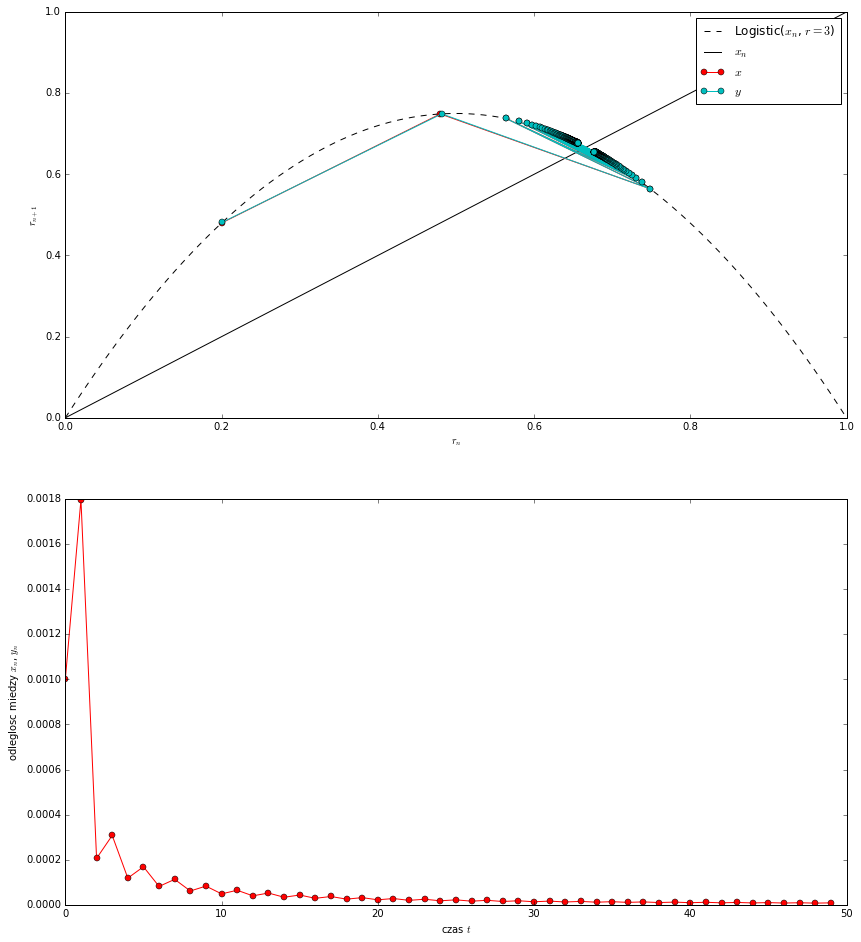

In [63]:
LogisticTrajectory(r=3)

Zamiast bifurkacji mamy pzbieganie do jednego punktu. Warto zauważyć że ten początek wygląda mniej więcej wykładniczo - dlatego że mapa logistyczna jest w przybliżeniu liniowa blisko tego fragmentu :) Gdyby była liniowa, byłoby w pełni wykładniczo. Ale nie jest, stąd wykładnicza jest po uśrednieniu.

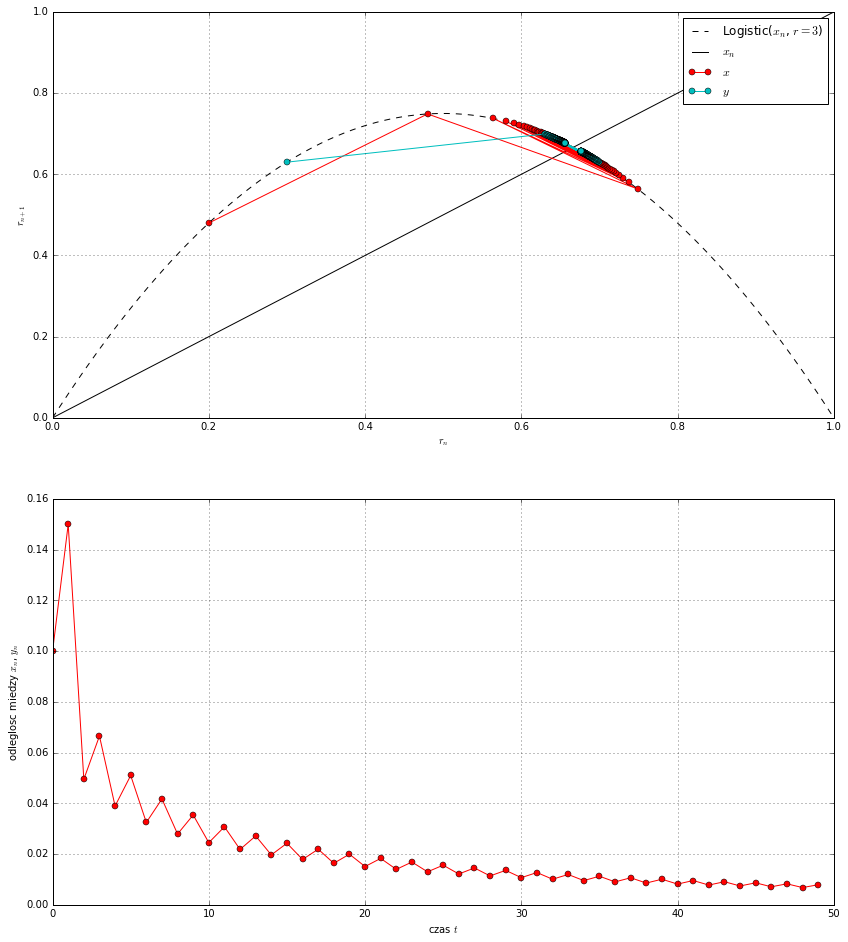

In [68]:
LogisticTrajectory(r=3, delta_x=0.1)

Tutaj lepiej widać, że zbliżanie się tych dwóch punktów jest faktycznie dość powolne.

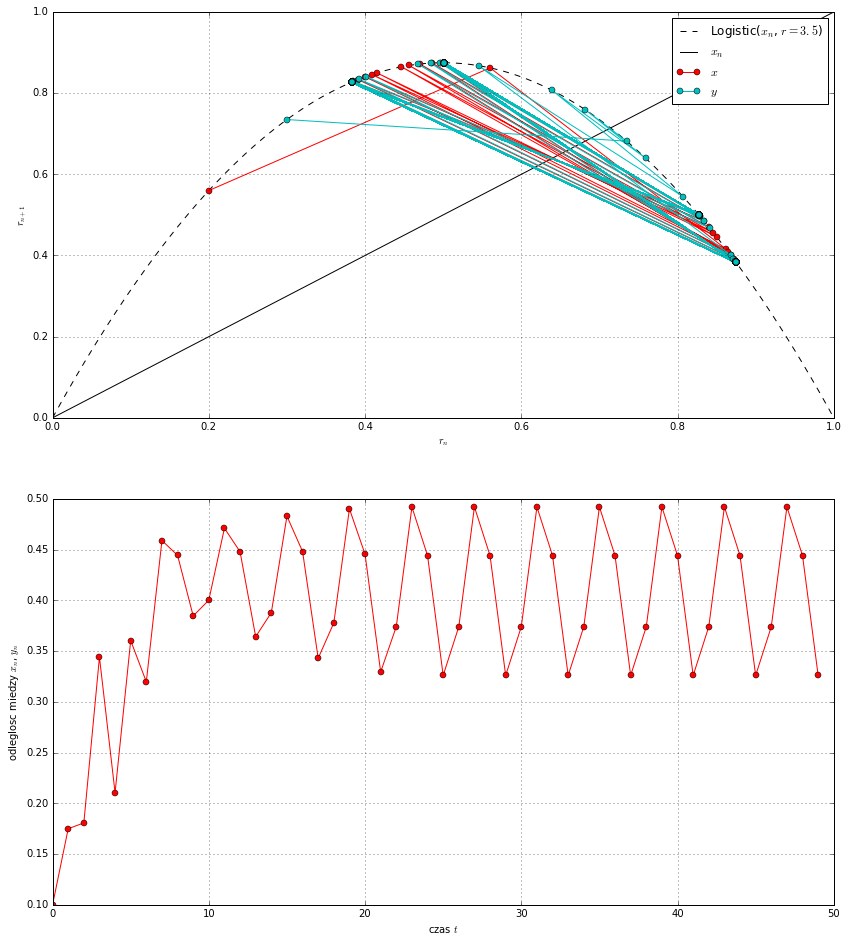

In [70]:
LogisticTrajectory(r=3.5, delta_x=0.1)

Chaos? Trochę niby chaos. Wait for it... :)

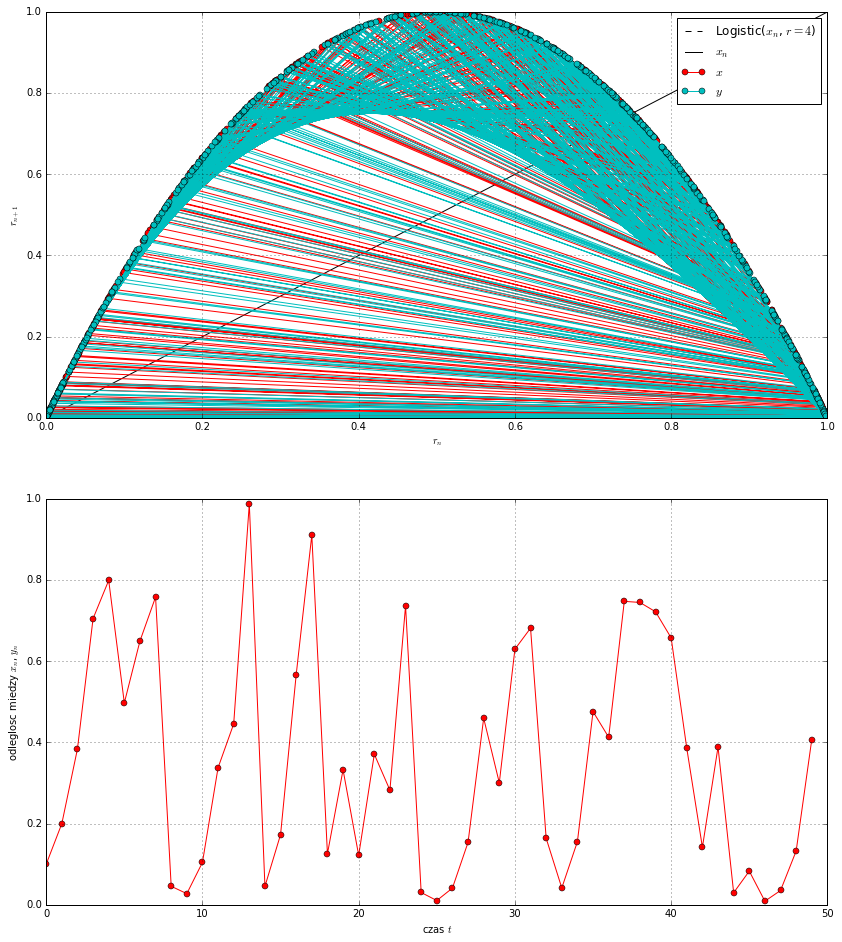

In [71]:
LogisticTrajectory(r=4, delta_x=0.1)

No a to, moi drodzy, jest chaos.

Czemu odległości nie lecą do nieskończoności, chociaż powinny? A jak one mają lecieć do nieskończoności, jak pracujemy w przestrzeni modulo 1 i ten punkt koło 5 iteracji (pierwszy dołek odległości) nie leci zamiast być gdzieś na 1.5 zostaje "zawinięty" do przedziału $(0, 1)$?

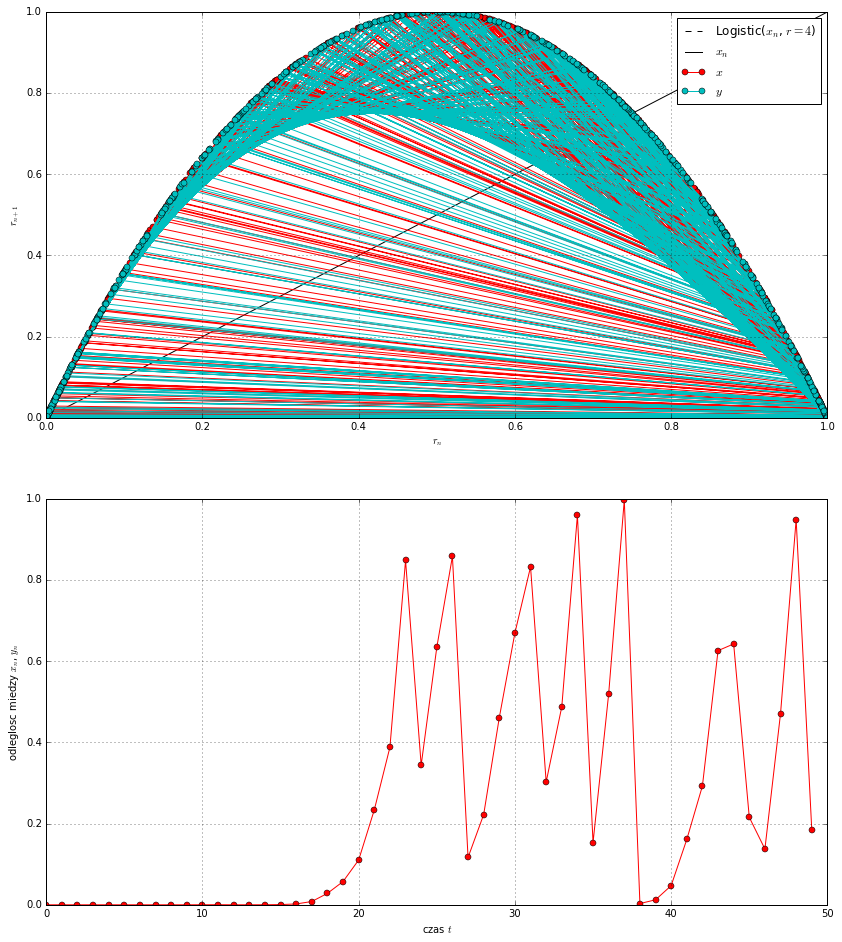

In [76]:
LogisticTrajectory(r=4, delta_x=1e-7)

Liczba punktów stałych **(dla unimodalnych? ogólnie?)** rośnie z liczbą złożeń

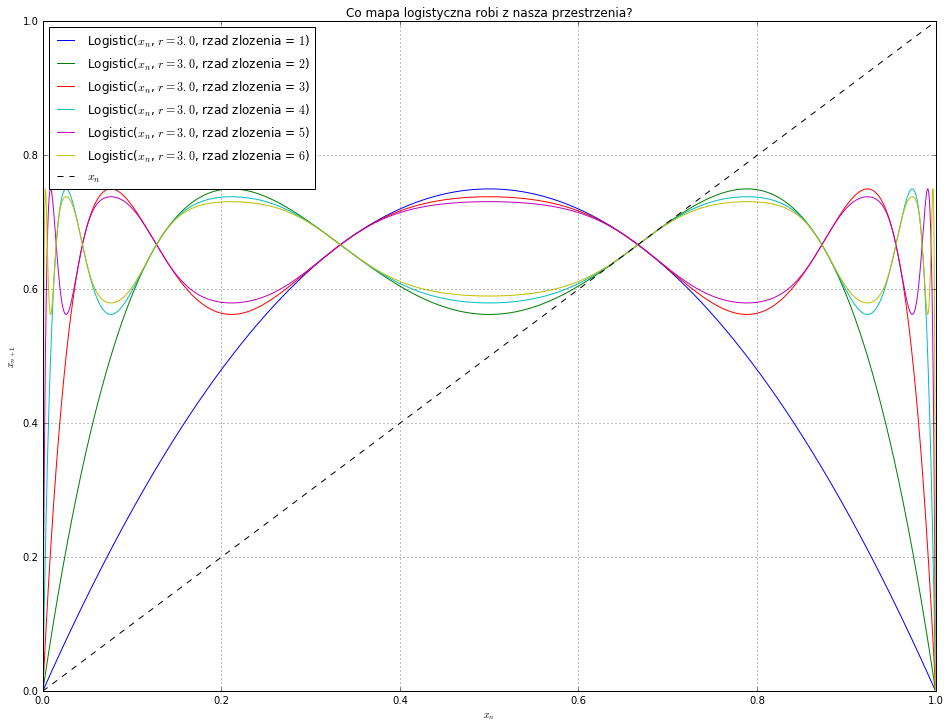

In [111]:
def Logistic(x, r):
    return r*x*(1.-x)

def LogisticRepeatedIteration(r, N=6):
    x = np.linspace(0,1,10000)
    y = x
    fig3, axes3 = plt.subplots(figsize=(16,12))
    for i in np.arange(N):
        y = Logistic(y, r)
        axes3.plot(x, y, label='Logistic($x_n$, $r={:.1f}$, rzad zlozenia = ${}$)'.format(r,i+1))
    axes3.set_title('Co mapa logistyczna robi z nasza przestrzenia?')
    axes3.plot(x, x, 'k--', label='$x_n$')
    axes3.set_xlabel('$x_n$')
    axes3.set_ylabel('$x_{n+1}$')
    axes3.grid()
    axes3.legend(loc=2)
LogisticRepeatedIteration(3)

No jacha, bo mamy wtedy coraz więcej przecięć z $x_{n+1} = x_n$. No... hm. Ale tu jest tyle samo przecięć cały czas...

Bo to jest trikowe! :)

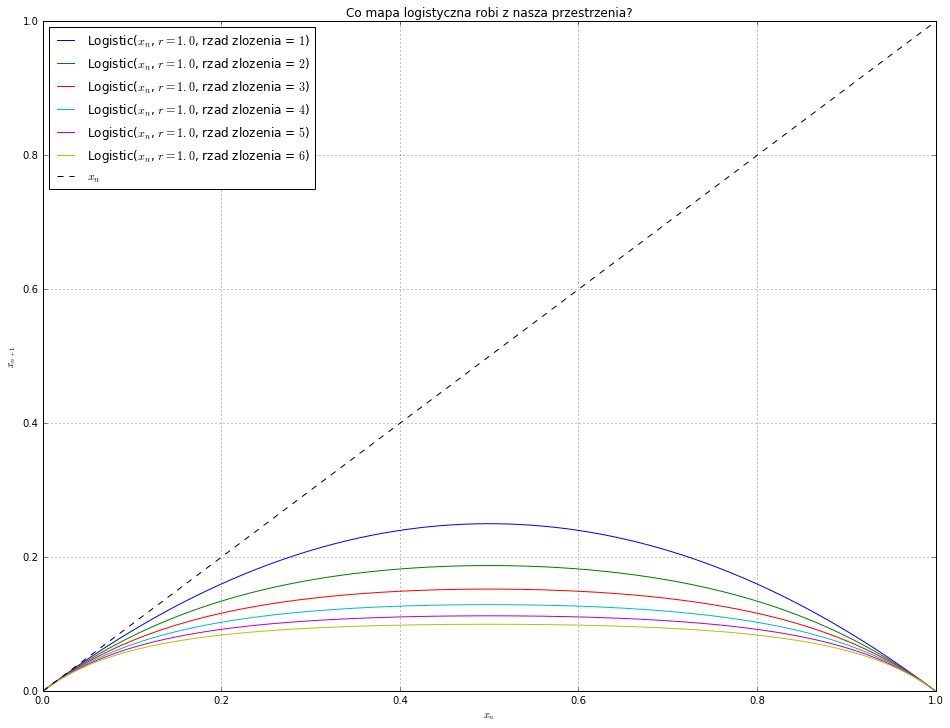

In [112]:
LogisticRepeatedIteration(1)

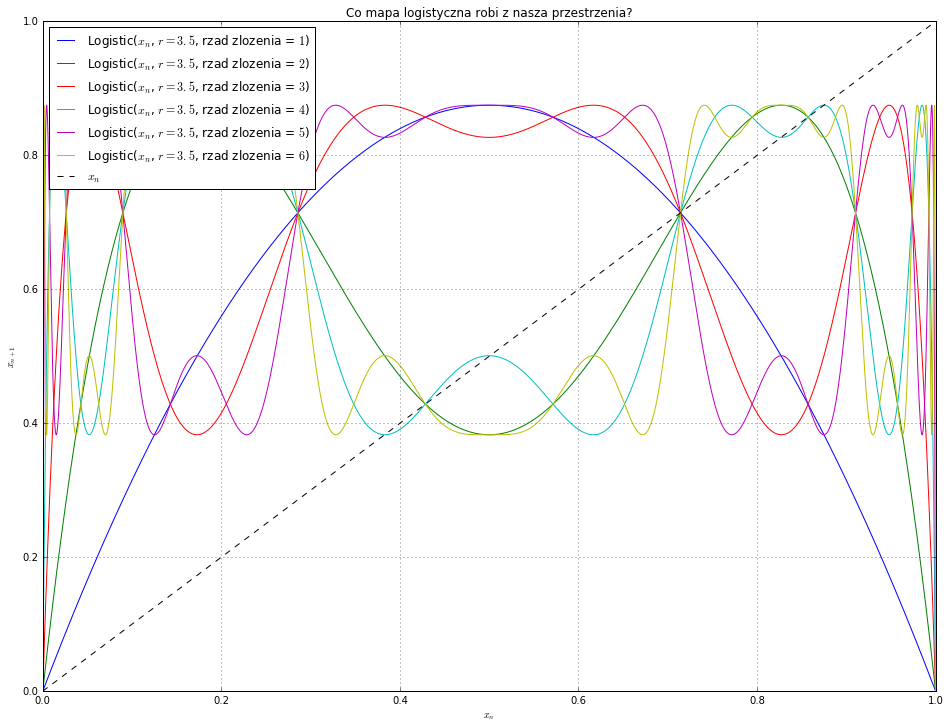

In [113]:
LogisticRepeatedIteration(3.5)

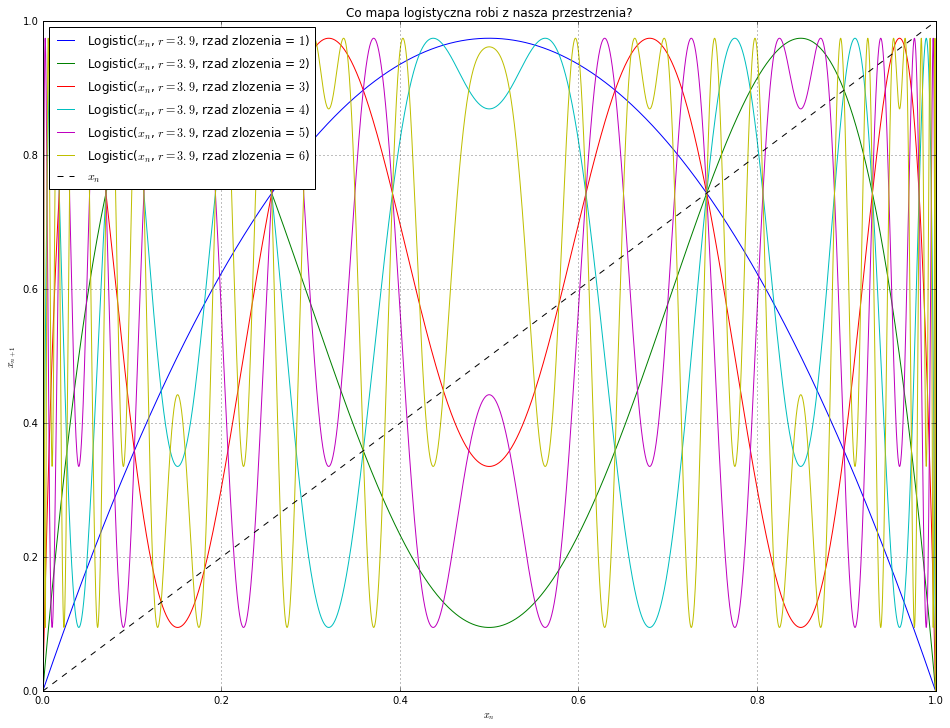

In [114]:
LogisticRepeatedIteration(3.9)

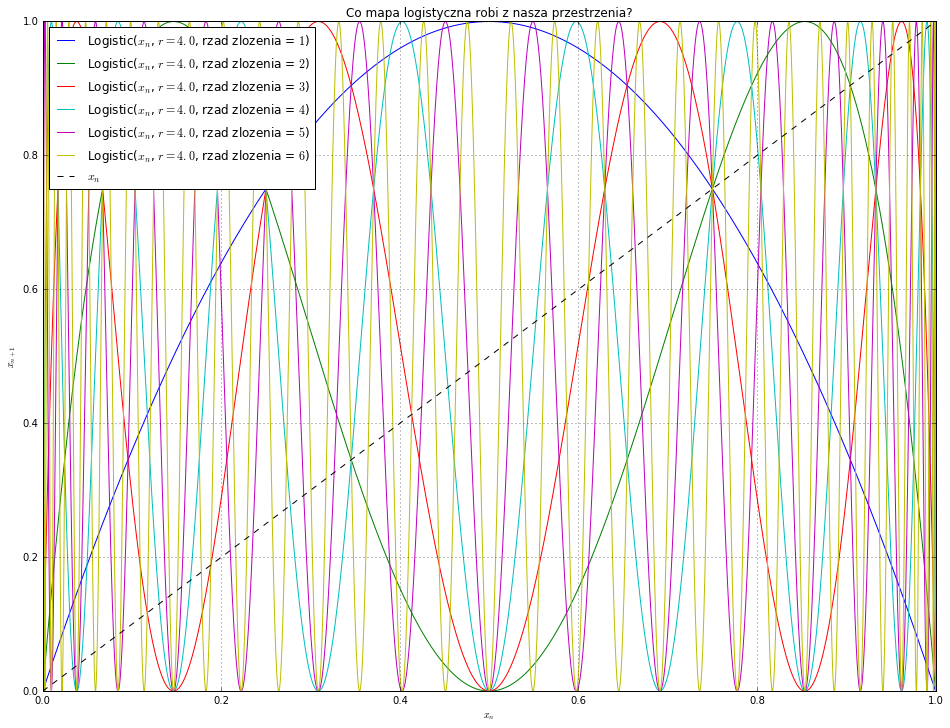

In [115]:
LogisticRepeatedIteration(4) #it's showtime!

Trzeba pamiętać o tym, że to jest "bezpośrednio" prawda tylko dla magicznego $r=4$. Czemu $r=4$ jest magiczne? Bo odwzorowuje $x_n$ z przedziału $(0,1)$ w przedział $(0,1)$! Dla mniejszych r możliwe wartości po tym odwzorowaniu są w mniejszym przedziale.

In [134]:
import sympy as sp
sp.init_printing()

x, r = sp.symbols('x, r')
f = 4*x*(1-x)
f

In [135]:
f.diff(x)

In [136]:
sp.Abs(f.diff(x))<1

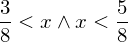

In [138]:
sp.solve(sp.Abs(f.diff(x))<1, x)

# Wykład 4 17.03.16

### Obliczenie gęstości niezmienniczej dla mapy namiotowej

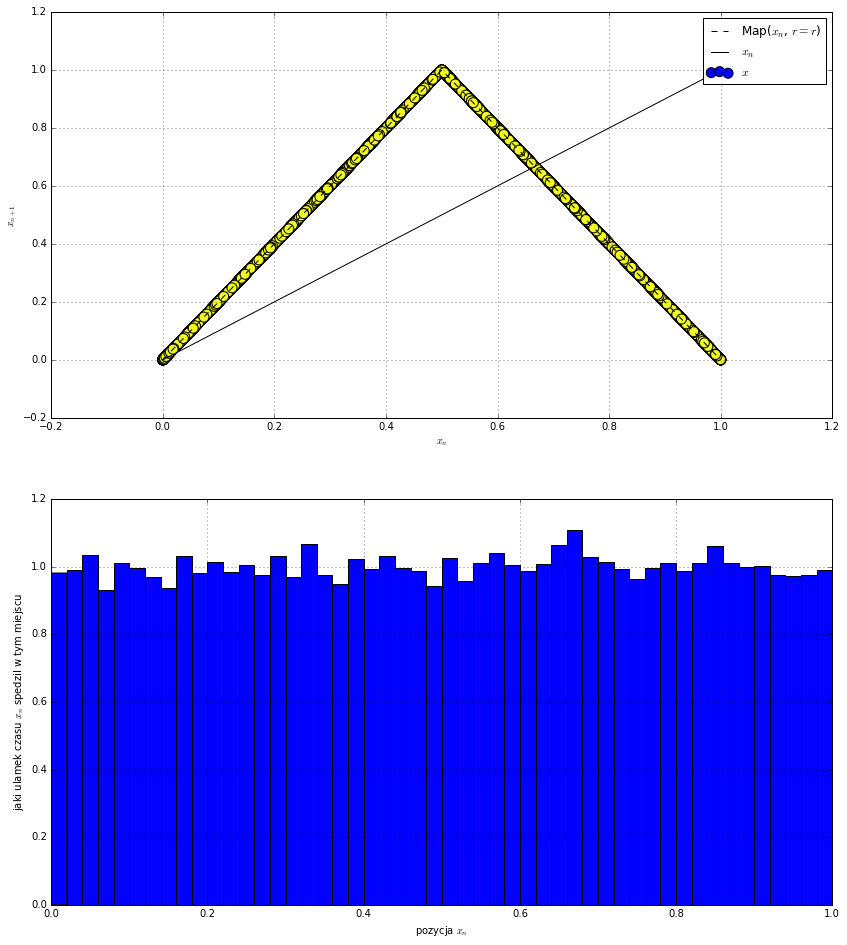

In [213]:
def Tent(x,a):
    data=np.array([x, 1-x])
    #print(data, np.min(data, axis=0))
    return a*np.min(data, axis=0)

def Histogram(x_0=0.2, a=2-1e-6, NT=50000, Nmin=5000, Map=Tent):
    x_grid = np.linspace(0,1,10000)
    x = x_0
    xl = np.zeros(NT)
    for i in range(NT):
        xl[i]=x
        x = Map(x, a)
    
    fig2, (axes2, axes2_time) = plt.subplots(2, figsize=(14,16))
    axes2.set_xlabel('$x_n$')
    axes2.set_ylabel('$x_{n+1}$')
    axes2.plot(x_grid, Map(x_grid,a), 'k--', label='Map($x_n$, $r={}$)'.format(r))
    axes2.plot(x_grid, x_grid, 'k-', label='$x_n$')
    axes2.scatter(xl[:-1], xl[1:], c = np.linspace(0,1,NT-1), s = 100, label='$x$', cmap='plasma')
    axes2.grid
    axes2.grid()
    axes2.legend()
    axes2_time.set_xlabel("pozycja $x_n$")
    axes2_time.set_ylabel("jaki ulamek czasu $x_n$ spedzil w tym miejscu")
    axes2_time.hist(xl[Nmin:], 50, normed=True)
    axes2_time.grid()
Histogram()

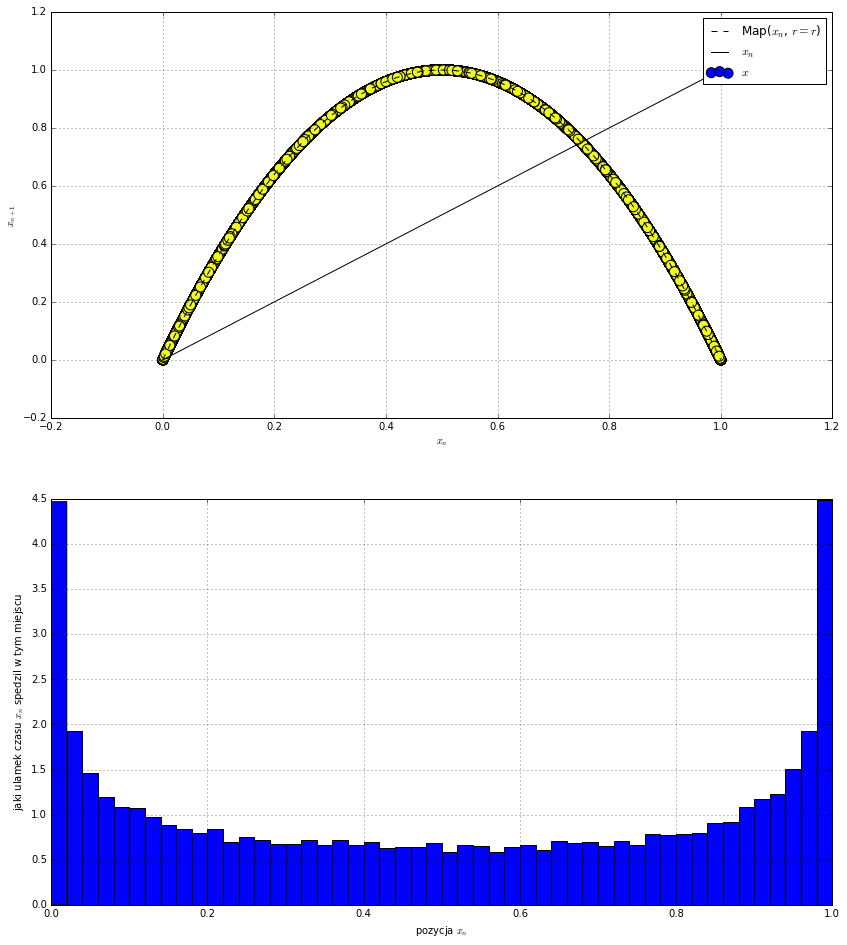

In [214]:
Histogram(a=4, Map=Logistic)

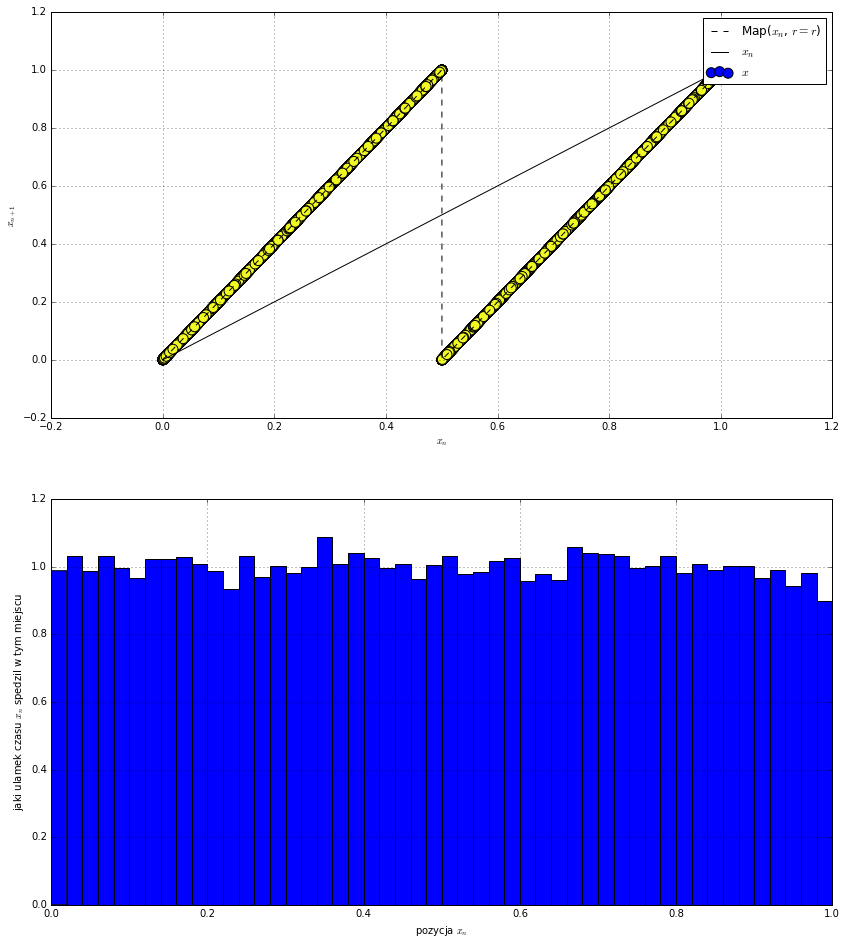

In [217]:
Histogram(Map=Bernoulli, a=1.999)

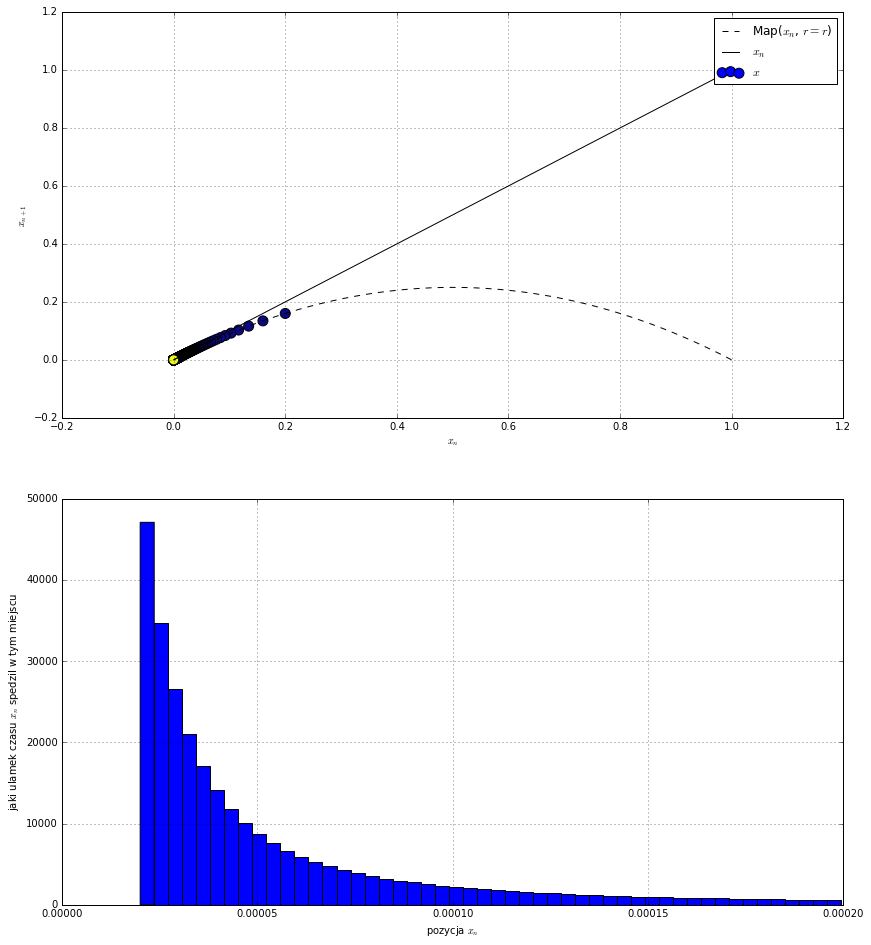

In [218]:
Histogram(Map=Logistic, a = 1)

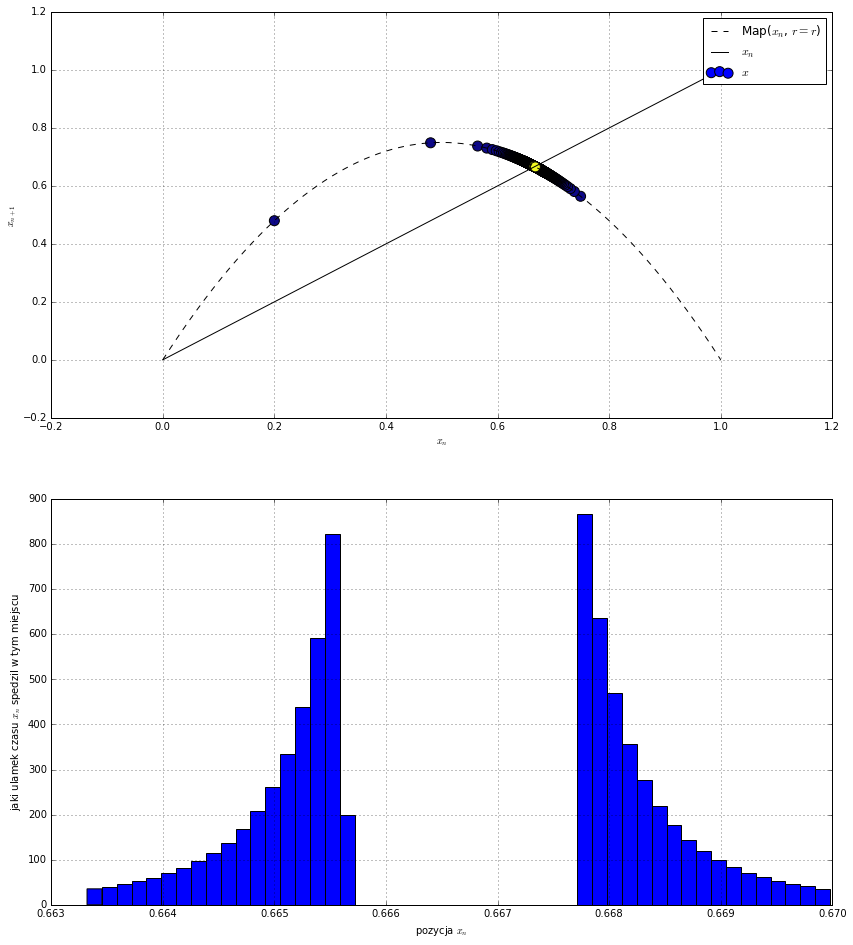

In [219]:
Histogram(Map=Logistic, a = 3)

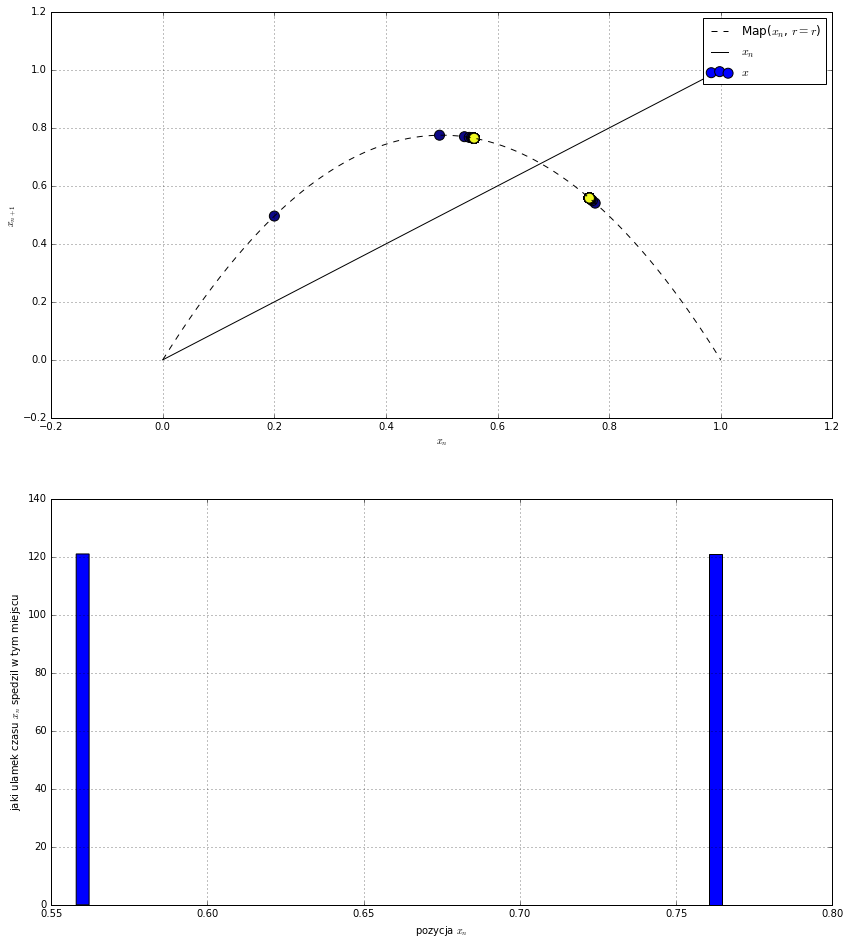

In [221]:
Histogram(Map=Logistic, a = 3.1)

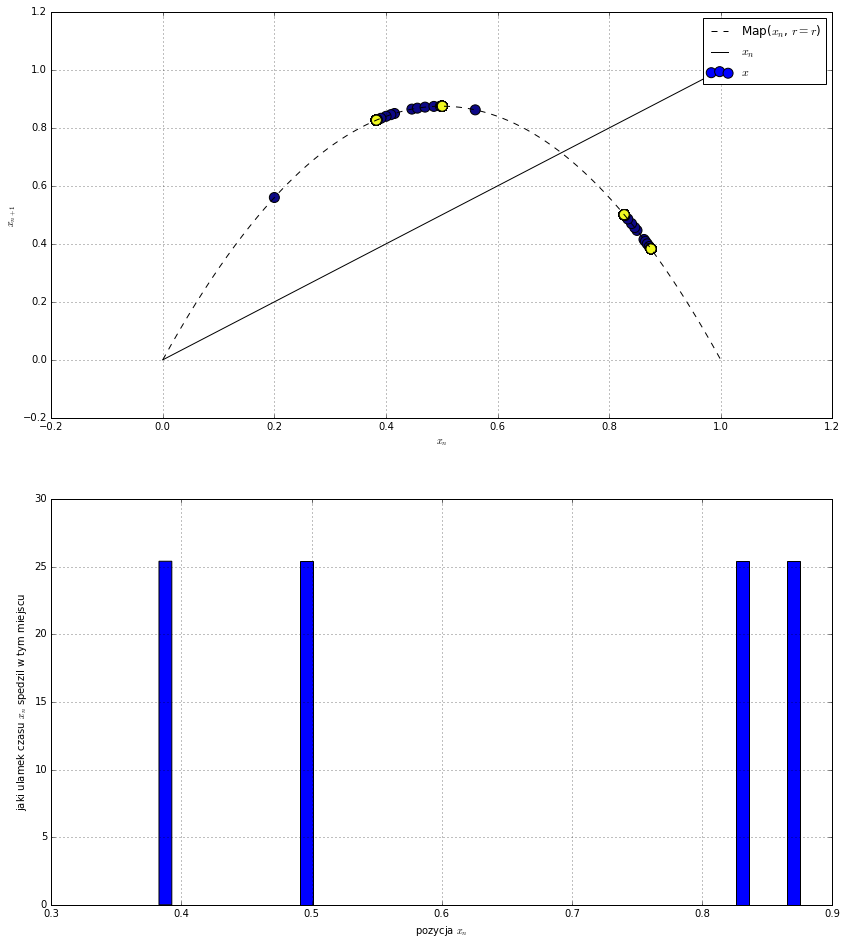

In [222]:
Histogram(Map=Logistic, a = 3.5)

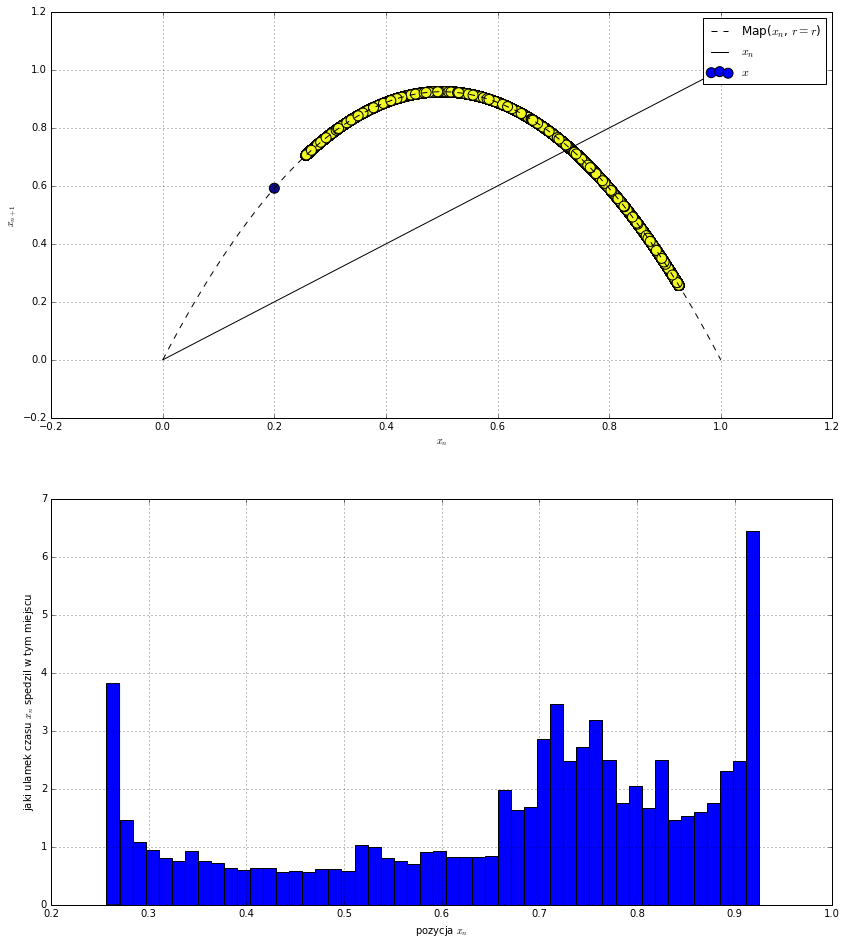

In [224]:
Histogram(Map=Logistic, a = 3.7)